xover1: 1000.0, mn: 70.0, ma: 70.0
xover2: 5000.0, mn: 50.0, ma: 50.0


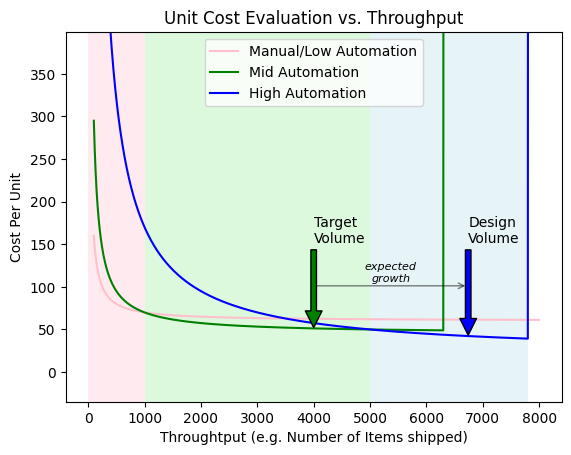

In [15]:
# mkdocs: render
# mkdocs: hidecode

from typing import Callable, Any
import matplotlib.pyplot as plt
import numpy as np

series = [
  {
    'color': 'pink',
    'fixed_cost': 100,
    'var_cost': 60,
    'label': 'Manual/Low Automation',
    'limit': -1
  },
  {
    'color': 'green',
    'fixed_cost': 250,
    'var_cost': 45,
    'label': 'Mid Automation',
    'limit': 63
  },
  {
    'color': 'blue',
    'fixed_cost': 1500,
    'var_cost': 20,
    'label': 'High Automation',
    'limit': 78
  }  
]

x_min = 1.0
x_max = 80.0
y_max = 0.4*1000.0/x_min
x_scale = 100
y_scale = 1

# Define the range of number of units produced
num_units = np.arange(x_min, x_max, 1/x_scale)

def unit_cost(s: dict[str, Any]) -> Callable[[float], float]:
  return lambda units : y_scale*(s['fixed_cost']/units + s['var_cost']) if s['limit'] < 0 or units < s['limit'] else y_scale*y_max

# Plot the graph
for s in series: 
  plt.plot([x*x_scale for x in num_units], 
           [unit_cost(s)(u) for u in num_units], 
           color=s['color'],
           label=s['label'])

manual_cross_over: float = (series[0]['fixed_cost'] - series[1]['fixed_cost'])/(series[1]['var_cost']-series[0]['var_cost'])
mid_cross_over: float =  (series[2]['fixed_cost'] - series[1]['fixed_cost'])/(series[1]['var_cost']-series[2]['var_cost'])
print(f"xover1: {manual_cross_over*x_scale}, mn: {unit_cost(series[0])(manual_cross_over)}, ma: {unit_cost(series[1])(manual_cross_over)}")
print(f"xover2: {mid_cross_over*x_scale}, mn: {unit_cost(series[1])(mid_cross_over)}, ma: {unit_cost(series[2])(mid_cross_over)}")
plt.axvspan(0, manual_cross_over*x_scale, facecolor='pink', alpha=0.3)
plt.axvspan(manual_cross_over*x_scale, mid_cross_over*x_scale, facecolor='lightgreen', alpha=0.3)
plt.axvspan(mid_cross_over*x_scale, series[2]['limit']*x_scale, facecolor='lightblue', alpha=0.3)

target = series[1]
design = series[2]
target_point = mid_cross_over*0.8
design_point = target['limit']*1.07
design_cost = unit_cost(design)(design_point)
target_cost = unit_cost(target)(target_point)
plt.annotate("Design\nVolume", xytext=(design_point*x_scale, target_cost+100), xy=(design_point*x_scale, design_cost), arrowprops=dict(facecolor='blue', shrink=0.01))
plt.annotate("Target\nVolume", xytext=(target_point*x_scale, target_cost+100), xy=(target_point*x_scale, target_cost), arrowprops=dict(facecolor='green', shrink=0.01))
plt.annotate("", xytext=(target_point*x_scale, target_cost+50), xy=(design_point*x_scale, target_cost+50), arrowprops=dict(facecolor='white', alpha=0.5, arrowstyle='->'))
plt.text((target_point+design_point)*x_scale/2.0, target_cost+55, "expected\ngrowth", ha='center', fontsize=8, fontstyle='oblique')

plt.ylim(ymax=y_max - 1)
plt.xlabel("Throughtput (e.g. Number of Items shipped)")
plt.ylabel("Cost Per Unit")
plt.title("Unit Cost Evaluation vs. Throughput")
plt.legend(loc="upper center")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the range of utilization values
rhos = np.linspace(0, 0.99, 100)

# Calculate the queuing factor
Qs = 1 / (1 - rhos)

# Plot the curve
plt.plot(rhos*100, Qs, color='blue', linewidth=2)

# Set the x and y axis labels
plt.xlabel("Utilization (%)")
plt.ylabel("Queuing Factor (QF)")

# Set the y axis tick format to two decimal places
plt.yticks(np.arange(0, 11, 0.1))

# Show the plot
plt.show()

r: 97.14285714285705, n_ticks: 11, min: 0, max: 99


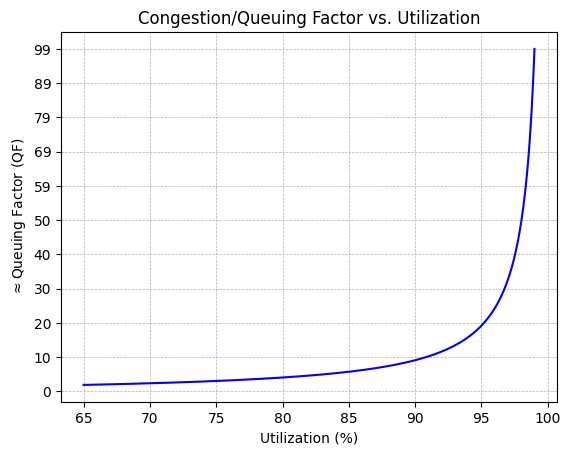

In [64]:
# Plot the curve $1/(1-\rho) for \rho between 0 and 0.99
#  with the x axis units expressed in percentage and the y axes labels with no decimal places
# Label the x axis as "Utilization" and the y axis as "Queuing Factor (QF)"
# Make the ticks on the x axis every .05 and have the y axis have 10 ticks between 0 and the maximum value of QF
# Add a grid for each tick on the x and y axis
# Title the graph "Congestion/Queuing Factor vs. Utilization"

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# min and max range
rho_m = 0.65
rho_M = 0.99

# Generate the data
rho = np.linspace(rho_m, rho_M, 1000)
QF = rho / (1 - rho)

# Plot the curve
plt.plot(rho*100, QF, color='blue', linewidth=1.5)

# Set the axis labels and units
plt.xlabel('Utilization (%)')
plt.ylabel(r'$\approx$Queuing Factor (QF)')

# Set the x-axis ticks every 0.05
plt.xticks(np.arange(100*min(rho), 100*max(rho)+2, 5))

y_formatter = ticker.FormatStrFormatter("%.0f")
plt.gca().yaxis.set_major_formatter(y_formatter)
range = max(QF) - min(QF)
n_ticks = int(range/10)+2
min_y = int(np.min(QF)/n_ticks)*n_ticks
max_y = (int(np.max(QF)/n_ticks)+1)*n_ticks
print(f"r: {range}, n_ticks: {n_ticks}, min: {min_y}, max: {max_y}")
plt.yticks(np.linspace(min_y, max_y, n_ticks, endpoint=True))

# Add a grid for each tick on the x and y axis
plt.grid(linestyle='--', linewidth=0.5)

# Set the title
plt.title('Congestion/Queuing Factor vs. Utilization')

# Show the plot
plt.show()

# Make the labels on the Y axis with no decimal places

r: 357.79785714285686, n_ticks: 15, min: 0, max: 360


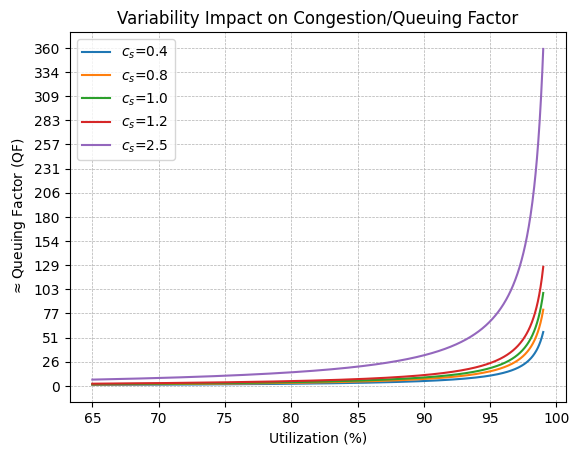

In [102]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# min and max range
rho_m = 0.65
rho_M = 0.99

# Generate the data
rho = np.linspace(rho_m, rho_M, 1000)

def qf(c_s: float) -> Callable[[float], float]:
  return lambda r : (r/(1-r))*(1+c_s*c_s)/2

c_s_range = 250
c_s_steps = 5

c_s_var = np.array([1.0 if s == 0 else s if s > 0 else -1/s for s in np.linspace(-c_s_range/100, c_s_range/100, c_s_steps)])

QFS = [(c_s, qf(c_s)(rho)) for c_s in c_s_var]

# Plot the curves
for QF in QFS:
  plt.plot(rho*100, QF[1], linewidth=1.5, label=r"$c_s$="+"{:.1f}".format(QF[0]))

# Set the axis labels and units
plt.xlabel('Utilization (%)')
plt.ylabel(r'$\approx$Queuing Factor (QF)')

# Set the x-axis ticks every 0.05
plt.xticks(np.arange(100*min(rho), 100*max(rho)+2, 5))

y_formatter = ticker.FormatStrFormatter("%.0f")
plt.gca().yaxis.set_major_formatter(y_formatter)
max_max = max([max(qf[1]) for qf in QFS])
min_min = min([min(qf[1]) for qf in QFS])
range = max_max - min_min
tick_interval = 26
n_ticks = int(range/tick_interval)+2
min_y = int(min_min/n_ticks)*n_ticks
max_y = (int(max_max/n_ticks)+1)*n_ticks
print(f"r: {range}, n_ticks: {n_ticks}, min: {min_y}, max: {max_y}")
plt.yticks(np.linspace(min_y, max_y, n_ticks, endpoint=True))

# Add a grid for each tick on the x and y axis
plt.grid(linestyle='--', linewidth=0.5)

# Set the title
plt.title('Variability Impact on Congestion/Queuing Factor')

plt.legend(loc="upper left")
# Show the plot
plt.show()

# Make the labels on the Y axis with no decimal places